<a href="https://colab.research.google.com/github/areebarshad/multi-asset-portfolio-optimizer/blob/main/notebooks/DataAcquisition_and_Preprocessing/DataAcquisition_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3-294456162.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = "2015-01-01", end = "2025-12-31")['Close']
[*********************100%***********************]  8 of 8 completed
/tmp/ipython-input-3-294456162.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method = 'ffill').fillna(method = 'bfill')
/tmp/ipython-input-3-294456162.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data.resample('M').last()


Data collected and shaped:  (2637, 8)
Ticker            DBC        EWJ         GLD        LQD         TLT  \
Date                                                                  
2015-01-02  15.931046  37.731194  114.080002  84.114647   97.243279   
2015-01-05  15.703831  37.295582  115.800003  84.458572   98.770775   
2015-01-06  15.555272  36.692421  117.120003  84.802536  100.550392   
2015-01-07  15.459145  37.228569  116.430000  84.914856  100.351799   
2015-01-08  15.520317  37.697685  115.940002  84.641075   99.022858   

Ticker            VEA        VNQ        VWO  
Date                                         
2015-01-02  27.559097  54.108128  29.359007  
2015-01-05  26.944887  54.404263  28.891462  
2015-01-06  26.645092  54.943878  28.750467  
2015-01-07  26.930271  55.786255  29.410976  
2015-01-08  27.339729  55.996841  29.908197  
Ticker
DBC    0
EWJ    0
GLD    0
LQD    0
TLT    0
VEA    0
VNQ    0
VWO    0
dtype: int64
0


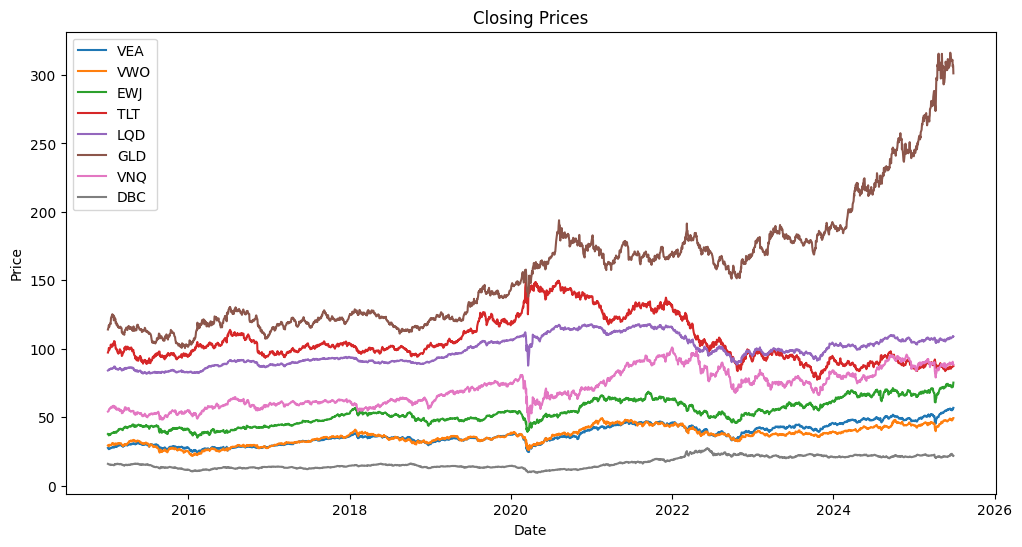

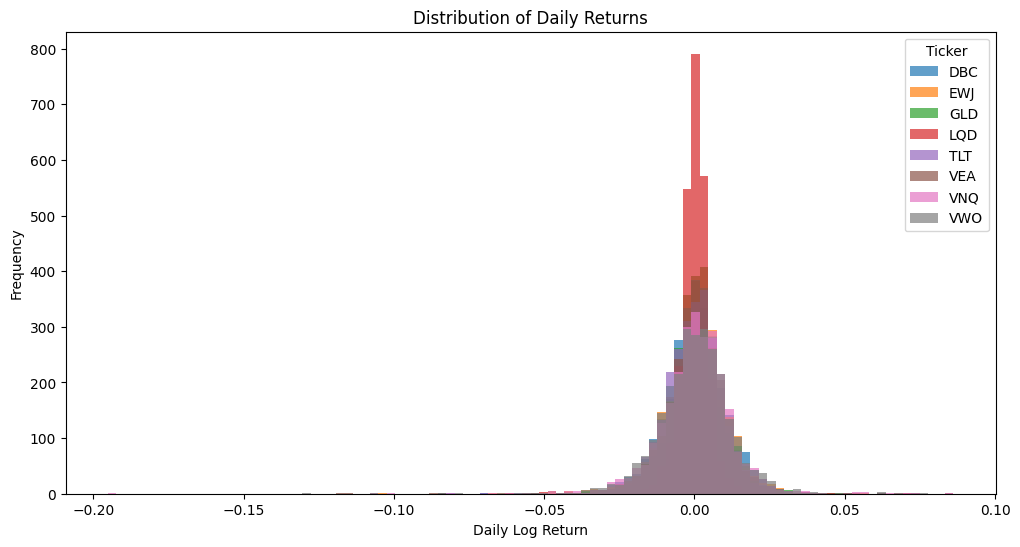

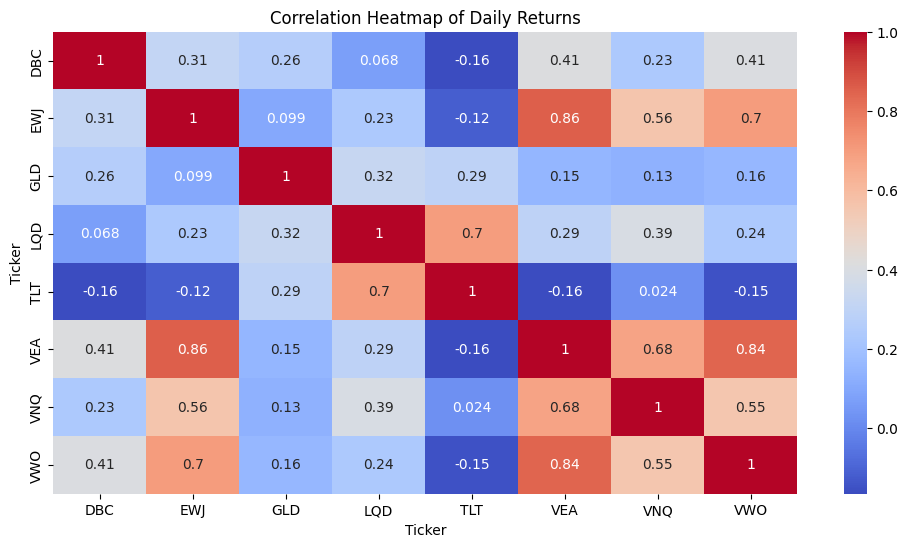

        Mean of Daily Returns  Standard Deviation of Daily Returns  \
Ticker                                                               
DBC                  0.000119                             0.011281   
EWJ                  0.000262                             0.010999   
GLD                  0.000368                             0.009104   
LQD                  0.000098                             0.005403   
TLT                 -0.000041                             0.009611   
VEA                  0.000275                             0.011055   
VNQ                  0.000187                             0.013229   
VWO                  0.000197                             0.012567   

        Annualized Return  Annualized Volatility  
Ticker                                            
DBC              0.029984               0.179082  
EWJ              0.066033               0.174607  
GLD              0.092821               0.144527  
LQD              0.024785               0.08

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#define multi-asset tickers
tickers = ['VEA', 'VWO', 'EWJ', 'TLT', 'LQD', 'GLD', 'VNQ', 'DBC']

#download the closing prices and save to csv
data = yf.download(tickers, start = "2015-01-01", end = "2025-12-31")['Close']
data.to_csv('/content/multiasset_closing_prices.csv')

#output a fitting message
print("Data collected and shaped: ", data.shape)
print(data.head())

#check for missing values
print(data.isnull().sum())

#forward fill then backfill if NaNs remain
data = data.fillna(method = 'ffill').fillna(method = 'bfill')

#confirm no missing data remains
print(data.isnull().sum().sum())

#calculate daily returns and save to csv
daily_returns = np.log(data / data.shift(1)).dropna()
daily_returns.to_csv('/content/multiasset_daily_returns.csv')

#calculate monthly returns
monthly_prices = data.resample('M').last()
monthly_returns = np.log(monthly_prices / monthly_prices.shift(1)).dropna()

#plot the closing prices
plt.figure(figsize = (12, 6))
for ticker in tickers:
  plt.plot(data[ticker], label = ticker)
plt.legend()
plt.title("Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

#plot daily return distributions
daily_returns.plot(kind = 'hist', bins = 100, alpha = 0.7, figsize = (12, 6))
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Log Return")
plt.show()

#plot the correlation heatmap
plt.figure(figsize = (12, 6))
sns.heatmap(daily_returns.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap of Daily Returns")
plt.show()

#calculate the mean and standard deviation of daily returns
stats = pd.DataFrame({'Mean of Daily Returns': daily_returns.mean(),
                      'Standard Deviation of Daily Returns': daily_returns.std()})

#annualize mean and std (assumption: 252 trading days)
stats['Annualized Return'] = stats['Mean of Daily Returns'] * 252
stats['Annualized Volatility'] = stats["Standard Deviation of Daily Returns"] * np.sqrt(252)

#display stats and save to csv
print(stats)
stats.to_csv('/content/multiasset_stats.csv')